# Example Notebook

Used to demonstrate the `SingleParameterExperimentTk` class in `toolkit.py`


## Importing

Minimal imports are required to start using `SingleParameterExperimentTk` as imports are
handled within the `toolkit.py` file.

`os` can be useful as the path to the directory containing the experiment data must be
passed as an argument to the `SingleParameterExperimentTk` class.

In [187]:
import os
from parameter_results.toolkit import SingleParameterExperimentTk

## Creating

To create a `SingleParameterExperimentTk` object; the `path` to the directory containing
the experiment data must be passed as an argument as well as the time-step size `dt`.

On object creation, all experiment data is automatically loaded into the following
attributes:

- `data_raw`: list of dataframes containing results for each parameter tested
- `data_avg`: list of DataFrames containing results for each parameter tested averaged
across al iterations
- `data_lob`: list of DataFrames containing Limit-Order-Book results for each parameter
tested

A dictionary containing default widgets is also created for use in the notebook:
- `widgets["param_value"]`: Dropdown widget for selecting a parameter value
- `widgets["iteration"]`: Dropdown widget for selecting an iteration value
- `widgets["variable"]`: MultiSelect widget for selecting variables

In [188]:
experiment = SingleParameterExperimentTk(
    path=os.getcwd() + "/TauScaling_Curve",
    dt=5/60
)

## Widgets

Widgets can be displayed in a notebook using the `display()` method.

In [189]:
experiment.display(["variable"])

Or by passing a list of widget keys to the `display()` method.

In [190]:
experiment.display(["param_value", "iteration", "variable"])

The toolkit currently supports the following widgets:

- `Dropdown`
- `SelectedMultiple`

(Note: all widgets can be passed `value` as an optional argument which can be useful for
creating widgets with default selections.)

In [191]:
experiment.add_widget_selectmultiple(
    key="left_axis_vars",
    des="Left Variables",
    options=experiment.data_avg[0].columns,
    value=["External Midprice", "Markprice"]
)

experiment.add_widget_selectmultiple(
    key="right_axis_vars",
    des="Right Variables",
    options=experiment.data_avg[0].columns,
    value=["Market Open Interest"]
)

In [192]:
experiment.display(["left_axis_vars", "right_axis_vars"])

## Methods:

The `SingleParameterExperimentTk` class has a number of methods which can be used to
visualise results from parameter experiments. These methods have been created with the
intent of being general.


The following utilities have already been built for the `SingleParameterExperimentTk`:
- `plot_results()`: plots multiple specified variable results on individual plots
- `plot_comparisons()`: plots multiple specified variables on the same plot
- `plot_lob()`: plots a 3D scatter plot of the Limit-Order-Book for the given parameter value and iteration.
- `animate_lob()`: creates a 3D animation of the Limit-Order-Book for the given parameter value and iteration.

Further utilities can be built using the following private methods:
- `_add_plot()`: adds a plot to the specified subplot
- `_add_data()`: adds a plot to the specified axis
- `_market_state_ticks():` modifies an axis ticks with market state labels

### `plot_results()`

Class method can be used to plot variable results over multiple runs.

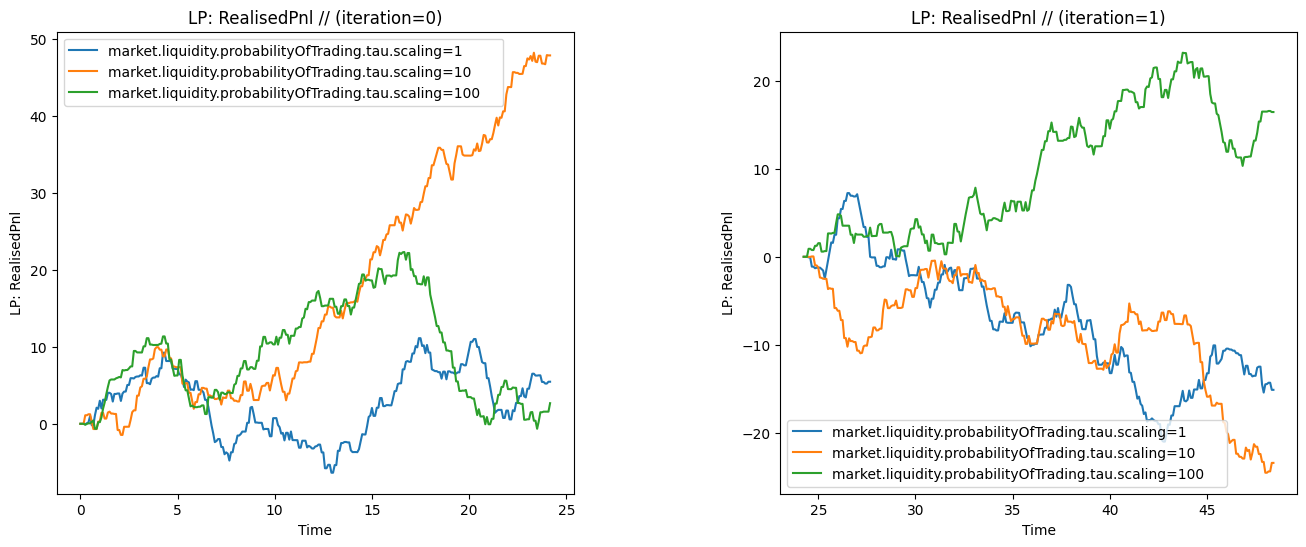

In [193]:
experiment.plot_results(variables=["LP: RealisedPnl"])

Default behaviour of plotting results for all iterations can be modified with the
`iterations` argument.

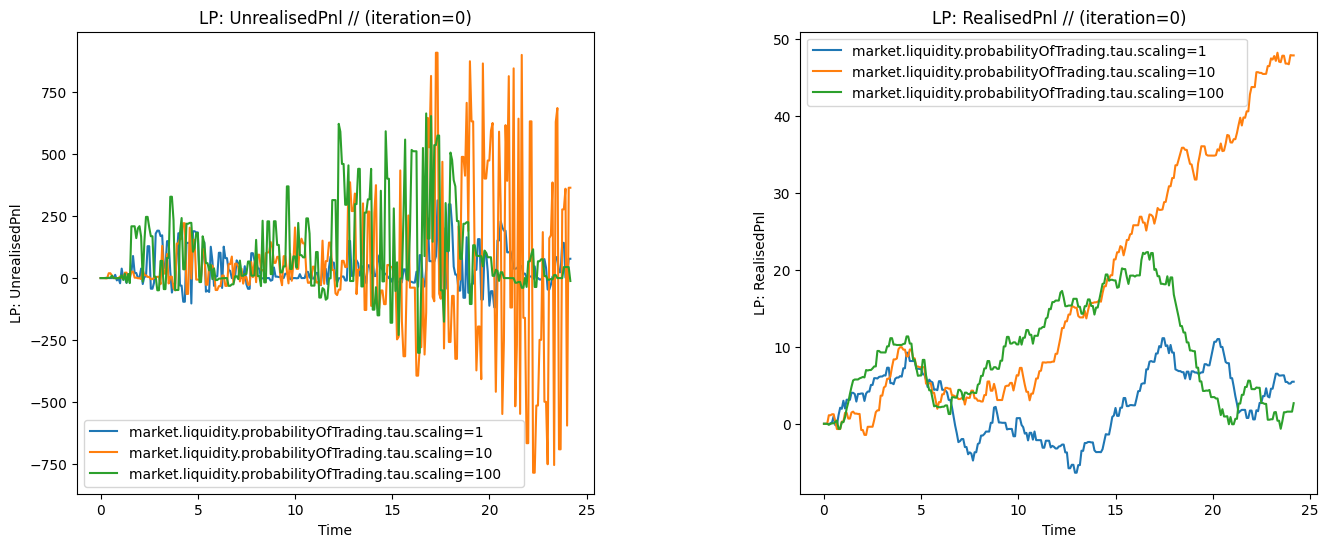

In [194]:
experiment.plot_results(variables=["LP: UnrealisedPnl", "LP: RealisedPnl"], iterations=[0])

Results averaged across all runs can be plotted by using "avg" in the `iterations`
argument.

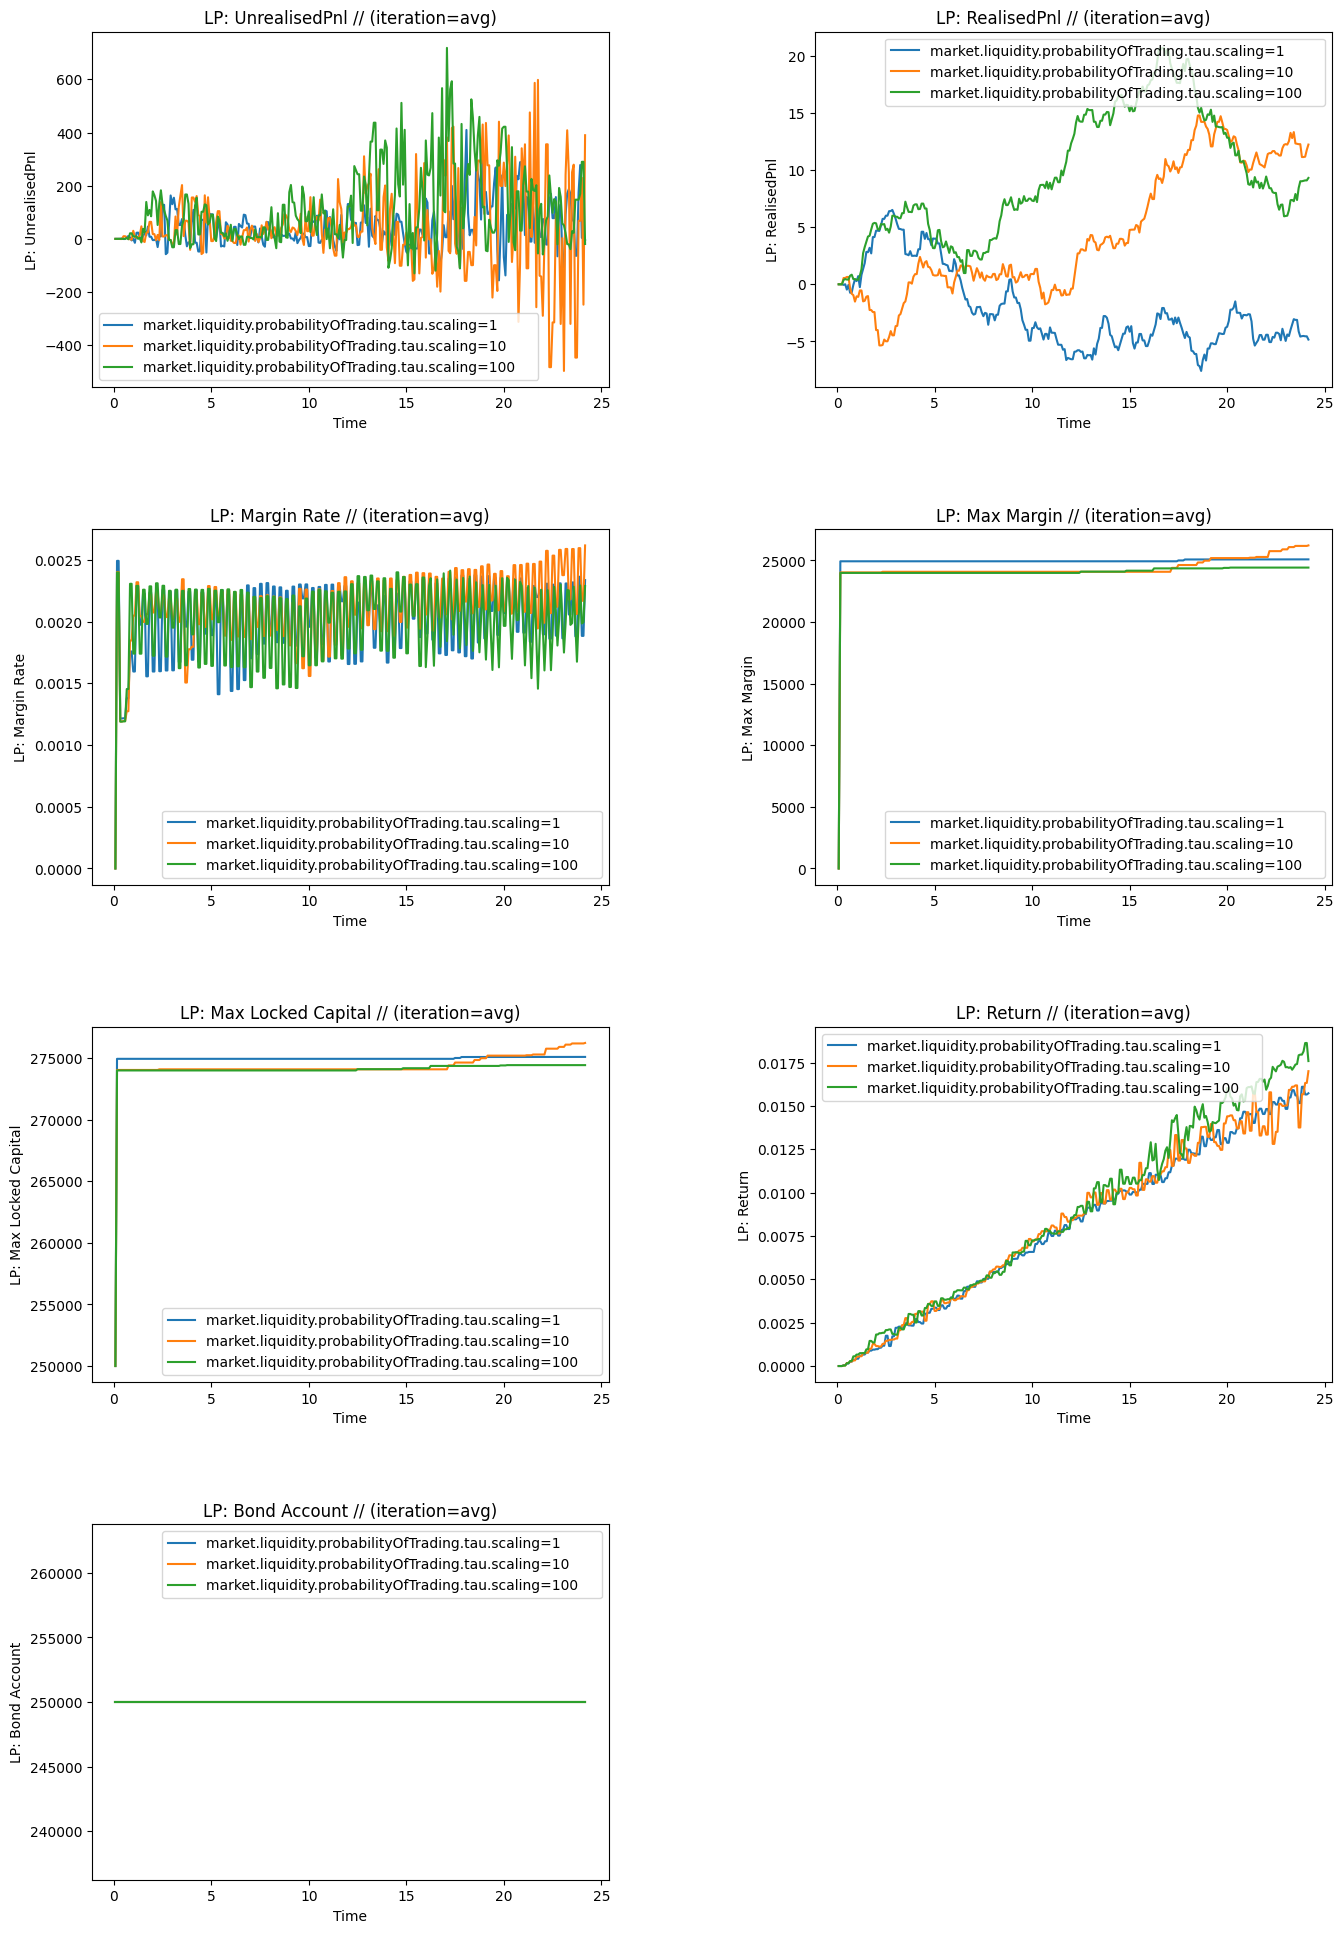

In [195]:
experiment.plot_results(variables=["LP: UnrealisedPnl", "LP: RealisedPnl", "LP: Margin Rate", "LP: Max Margin","LP: Max Locked Capital", "LP: Return", "LP: Bond Account"], iterations=["avg"])

By default; if no `variables` argument passed, method uses the values selected in the
`variable` MultipleSelection widget.

In [196]:
experiment.display(["variable"])

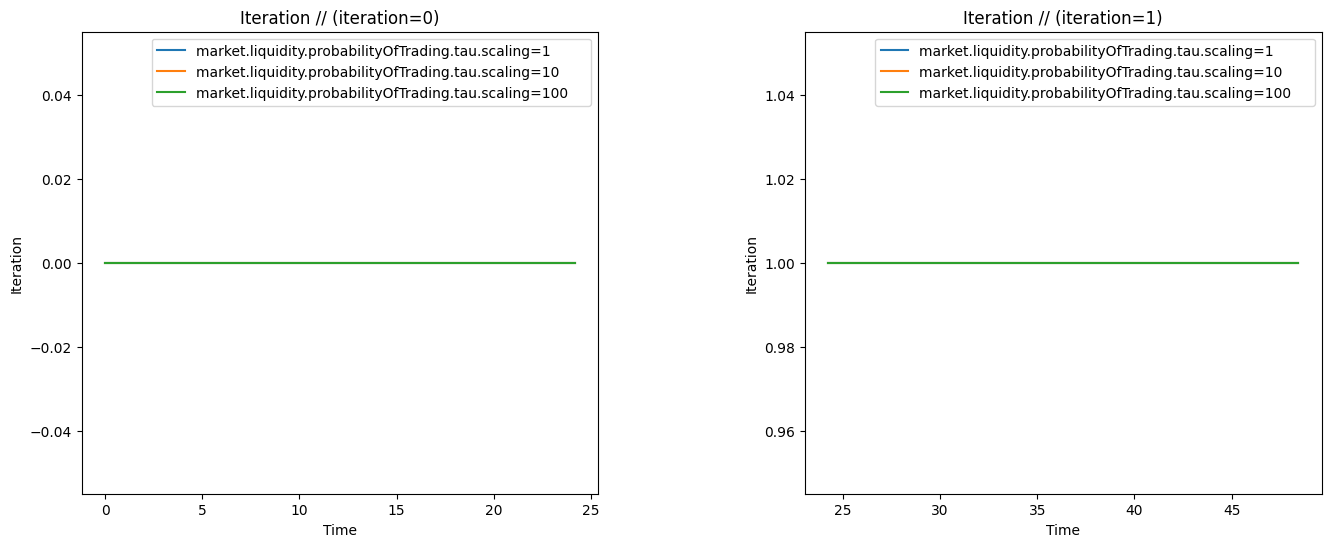

In [197]:
experiment.plot_results()

If `"Market State"` is included in a variables argument. The toolkit will
automatically adjust the ticks for the relevant axis to a human readable format.§

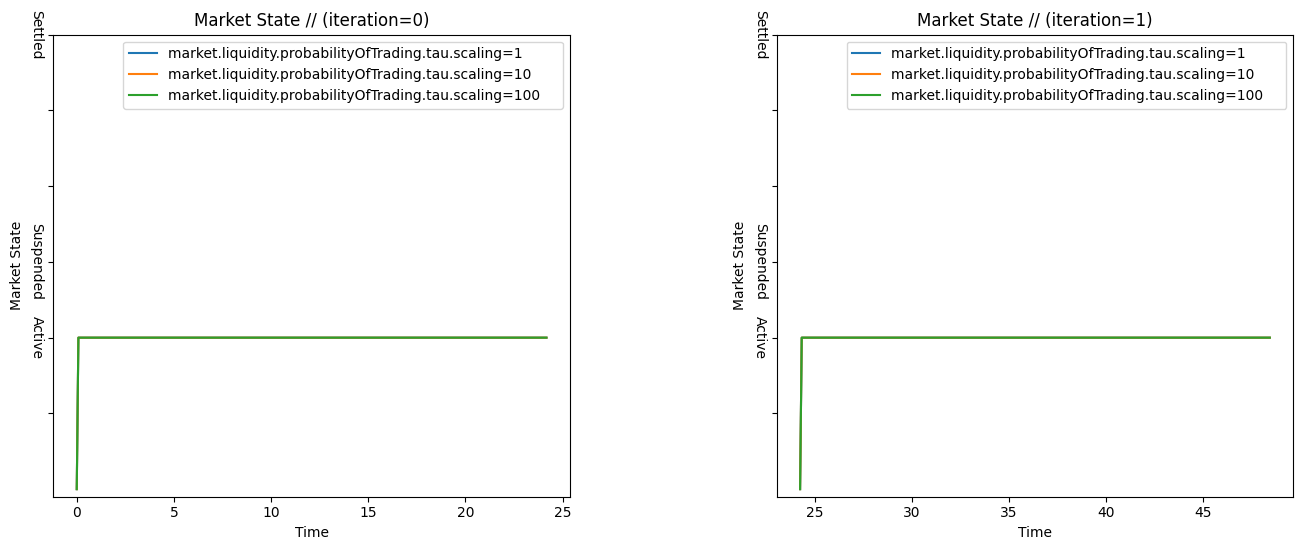

In [198]:
experiment.plot_results(variables=["Market State"])

### `plot_comparison()`:

Class method can be used to plot multiple variables on either the left or right axis. By
default it will split selected parameter values and iterations across subplots.

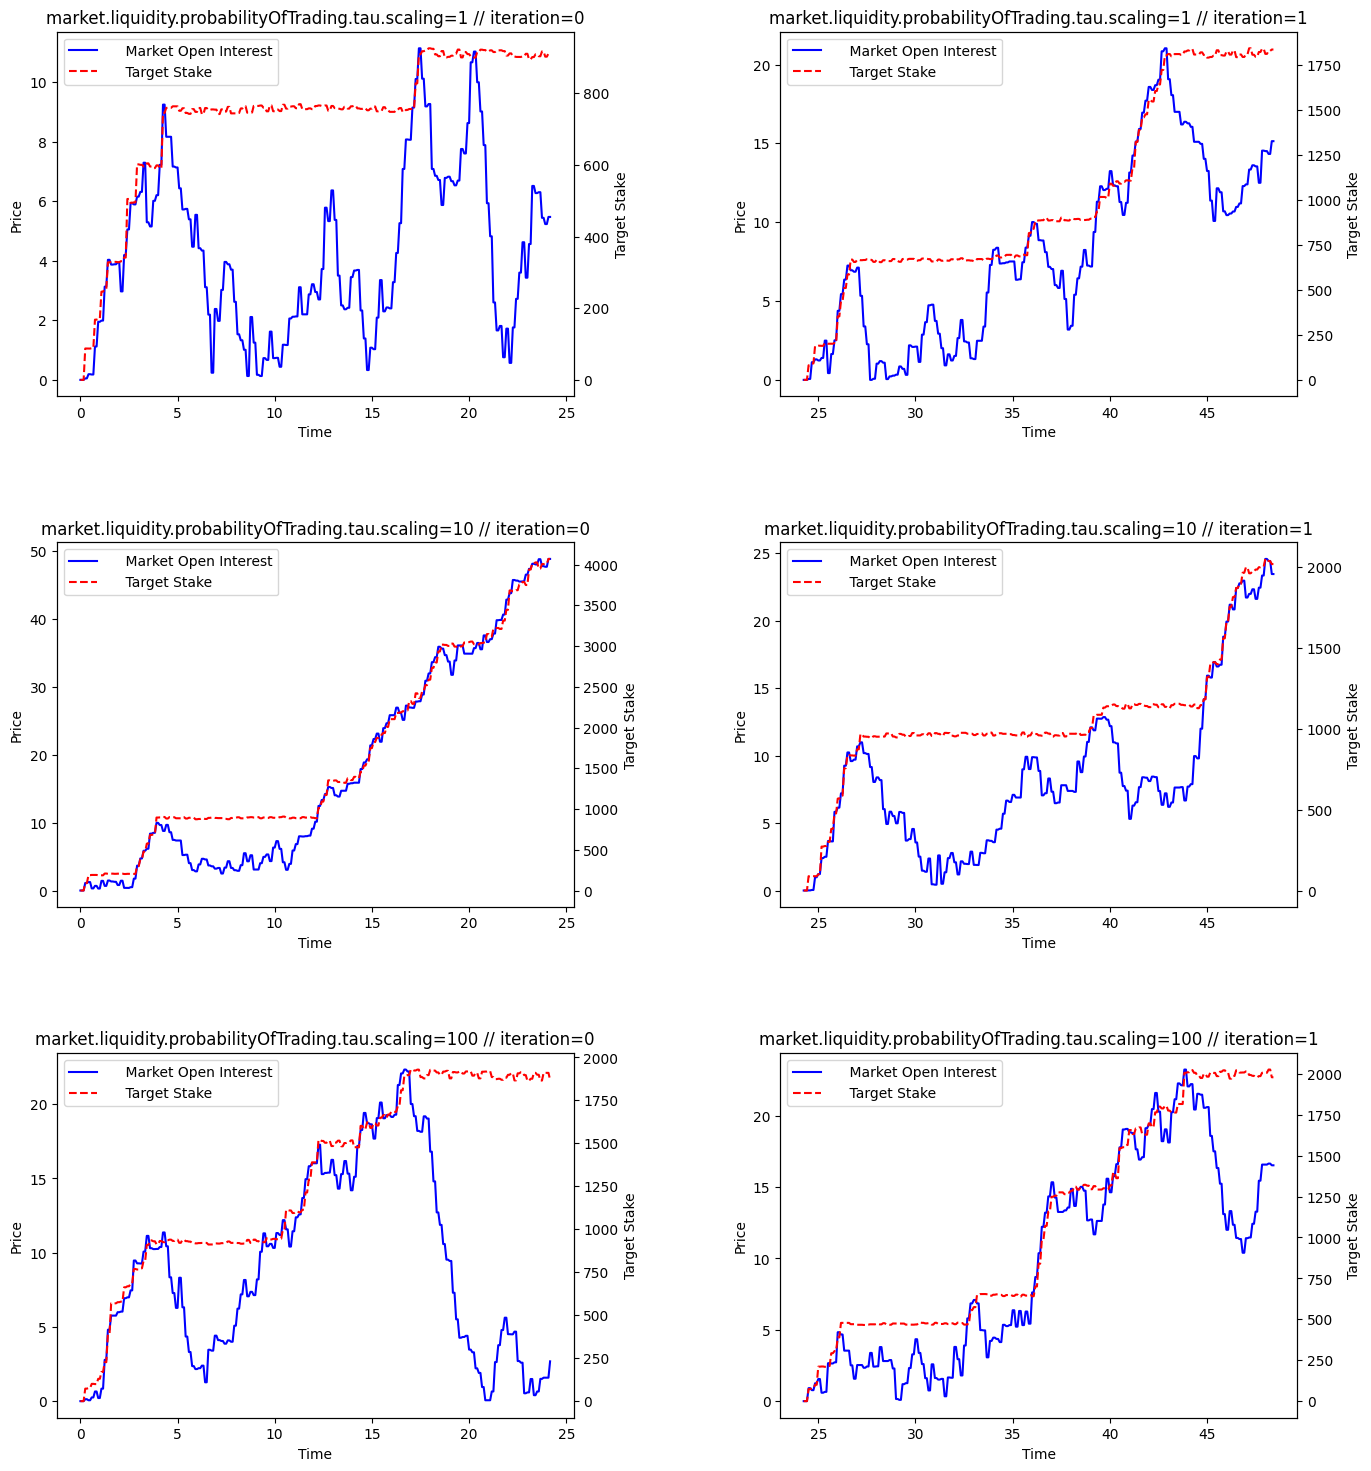

In [199]:
experiment.plot_comparison(
    variables=["Market Open Interest"],
    formats=["b-"],
    ylabel="Price",
    variables_right=["Target Stake"],
    formats_right=["r--"],
    ylabel_right="Target Stake",
)

If `"Market State"` is included in a variables argument. The toolkit will
automatically adjust the ticks for the relevant axis to a human readable format.

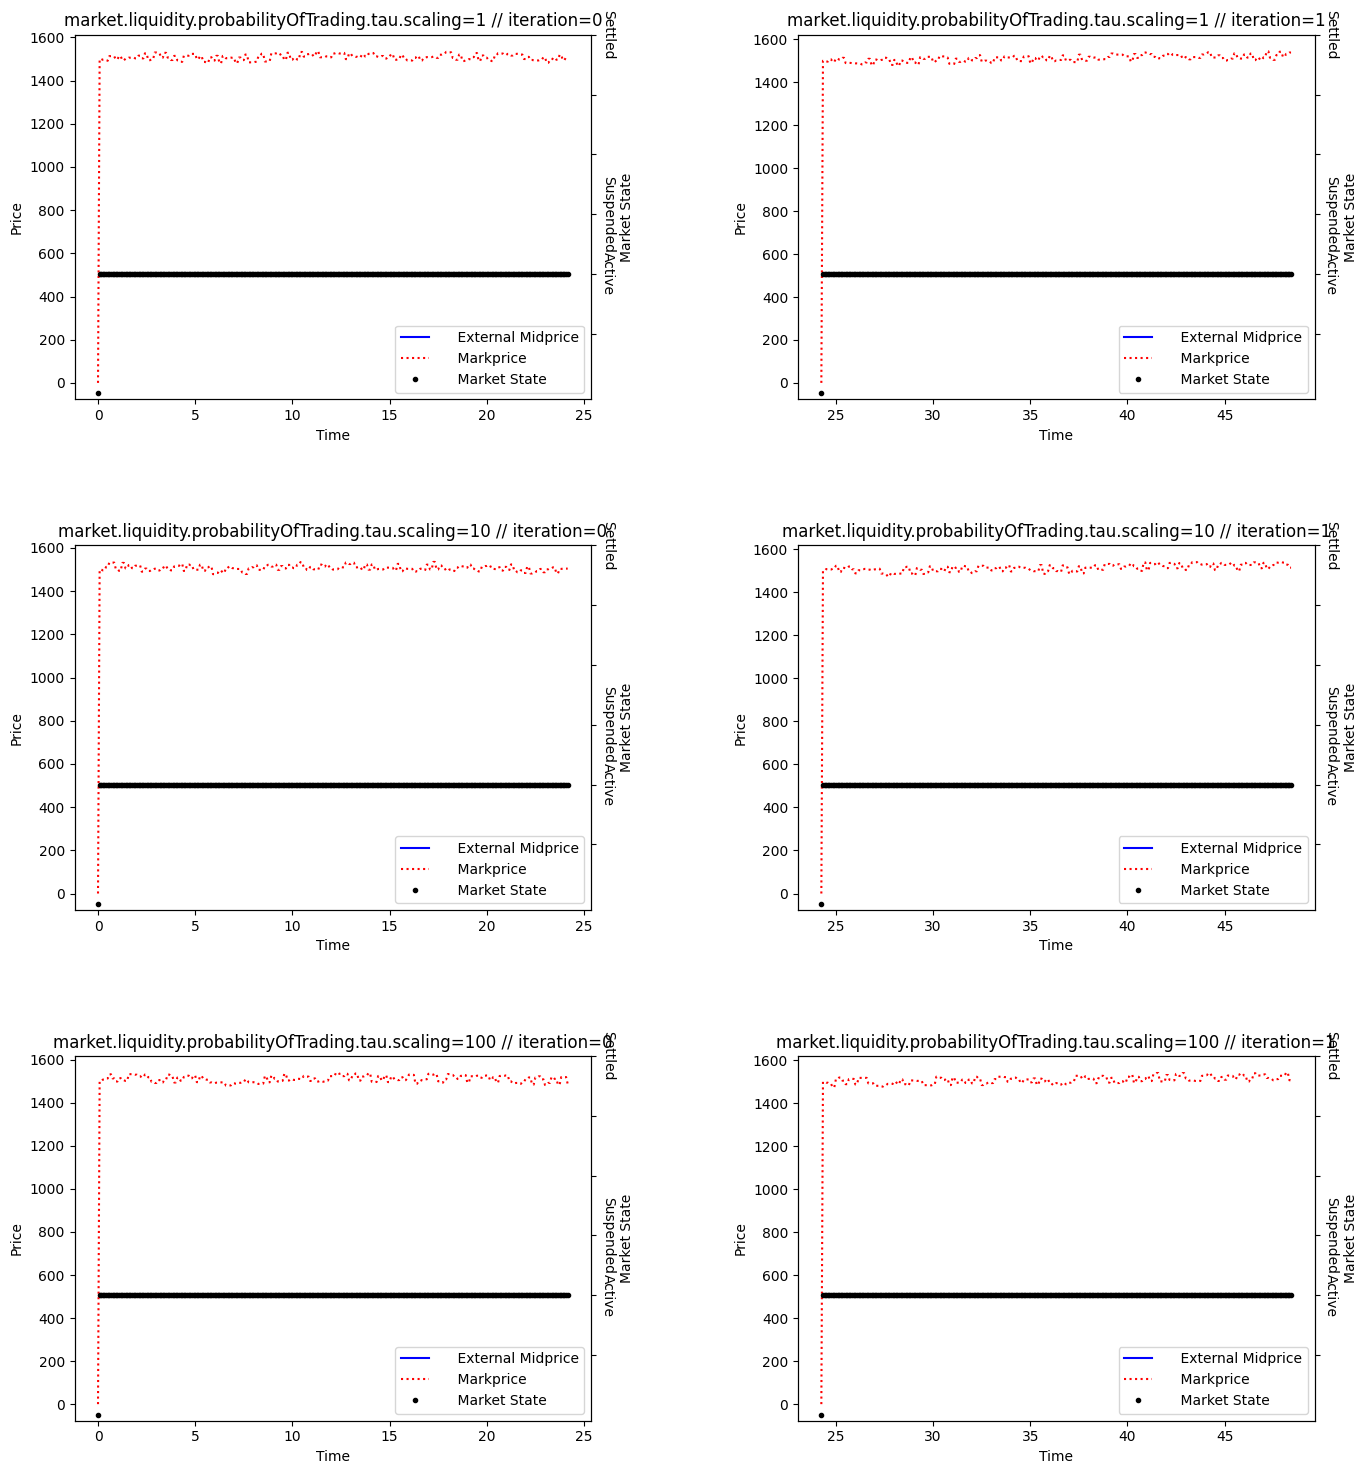

In [200]:
experiment.plot_comparison(
    variables=["External Midprice", "Markprice"],
    formats=["b-", "r:"],
    ylabel="Price",
    variables_right=["Market State"],
    formats_right=["k."],
    ylabel_right="Market State",
)

### `plot_lob()`

Class method creates a 3D scatter plot of the Limit-Order-Book for the specified parameter value and iteration.

If no parameter value or iteration value is passed the method defaults to using values selected in the relevant widgets.

In [201]:
experiment.display(["param_value", "iteration"])

In [202]:
experiment.plot_lob()

### `animate_lob()`

Class method creates a 2D animation of the Limit-Order-Book for the specified parameter value and iteration.

If no parameter value or iteration value is passed the method defaults to using values selected in the relevant widgets.

In [203]:
experiment.display(["param_value", "iteration"])

In [204]:
experiment.animate_lob()